In [28]:
import os
import random
import numpy as np
from google.colab import drive
import tensorflow as tf
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.applications import EfficientNetV2L
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Periodo 4/animals/'
categories = ['dogs', 'panda', 'cats']
os.listdir(os.path.join(path))

['panda', 'dogs', 'cats']

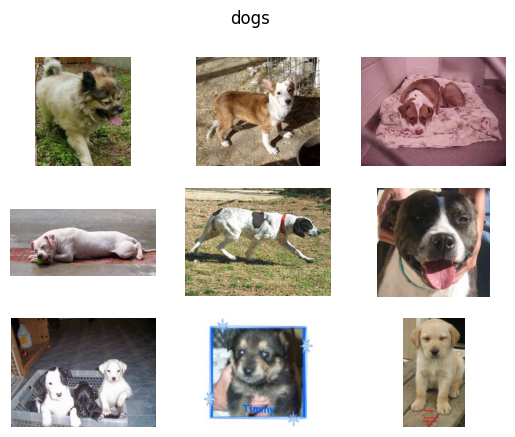

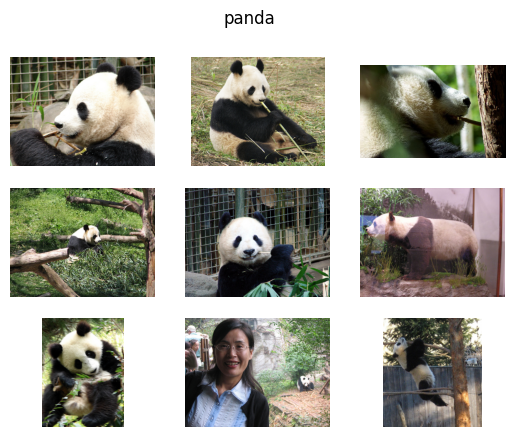

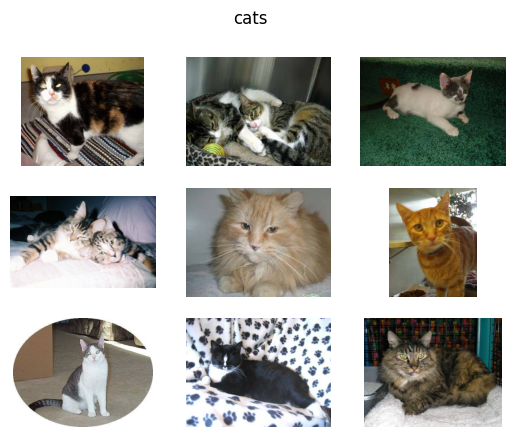

In [4]:
for category in categories:
    fig, _ = plt.subplots(3,3)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+category)[:9]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 3, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [5]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => altura min : ', min(shape0), 'largura min : ', min(shape1))
    print(category, ' => altura max : ', max(shape0), 'largura max : ', max(shape1))
    shape0 = []
    shape1 = []

dogs  => altura min :  50 largura min :  59
dogs  => altura max :  500 largura max :  500
panda  => altura min :  87 largura min :  78
panda  => altura max :  1200 largura max :  1600
cats  => altura min :  32 largura min :  55
cats  => altura max :  500 largura max :  500


In [6]:
data = []
labels = []
imagePaths = []
HEIGHT = 60
WIDTH = 60
N_CHANNELS = 3

for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k])

random.shuffle(imagePaths)
print(imagePaths[:10])

for imagePath in imagePaths:

    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))
    data.append(image)
    label = imagePath[1]
    labels.append(label)

[['/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Periodo 4/animals/dogs/dogs_00075.jpg', 0], ['/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Periodo 4/animals/cats/cats_00302.jpg', 2], ['/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Periodo 4/animals/dogs/dogs_00042.jpg', 0], ['/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Periodo 4/animals/cats/cats_00150.jpg', 2], ['/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Periodo 4/animals/panda/panda_00390.jpg', 1], ['/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Periodo 4/animals/panda/panda_00979.jpg', 1], ['/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/Trainee/Dataset/Periodo 4/animals/dogs/dogs_00574.jpg', 0], ['/content/drive/MyDrive/UnB/IEEE Computational Intellige

In [7]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

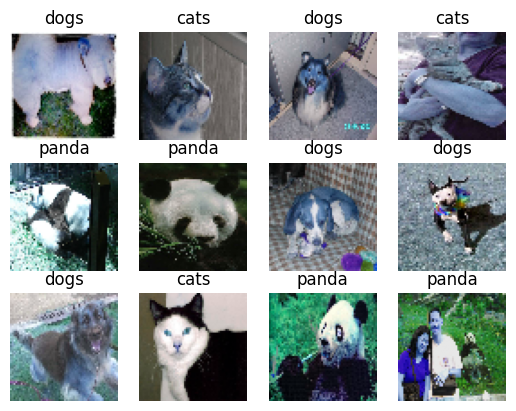

In [8]:
fig, _ = plt.subplots(3,4)
fig.patch.set_facecolor('xkcd:white')
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [9]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=0)
trainY = np_utils.to_categorical(trainY, 3)

In [10]:
model = Sequential()
model.add(Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 59, 59, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

In [11]:
logdir = 'logs'

In [12]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [13]:
hist = model.fit(trainX, trainY, batch_size=256, epochs=25, verbose=1 , callbacks=[tensorboard_callback])

Epoch 1/25
10/10 [==============================] - 26s 2s/step - loss: 1.0535 - accuracy: 0.4504
Epoch 2/25
10/10 [==============================] - 26s 3s/step - loss: 0.8497 - accuracy: 0.5742
Epoch 3/25
10/10 [==============================] - 11s 1s/step - loss: 0.7744 - accuracy: 0.6083
Epoch 4/25
10/10 [==============================] - 16s 2s/step - loss: 0.7462 - accuracy: 0.6083
Epoch 5/25
10/10 [==============================] - 9s 896ms/step - loss: 0.7075 - accuracy: 0.6450
Epoch 6/25
10/10 [==============================] - 11s 1s/step - loss: 0.6951 - accuracy: 0.6521
Epoch 7/25
10/10 [==============================] - 12s 1s/step - loss: 0.6625 - accuracy: 0.6621
Epoch 8/25
10/10 [==============================] - 11s 1s/step - loss: 0.6499 - accuracy: 0.6846
Epoch 9/25
10/10 [==============================] - 10s 977ms/step - loss: 0.6239 - accuracy: 0.6917
Epoch 10/25
10/10 [==============================] - 11s 1s/step - loss: 0.6108 - accuracy: 0.7029
Epoch 11/25
10

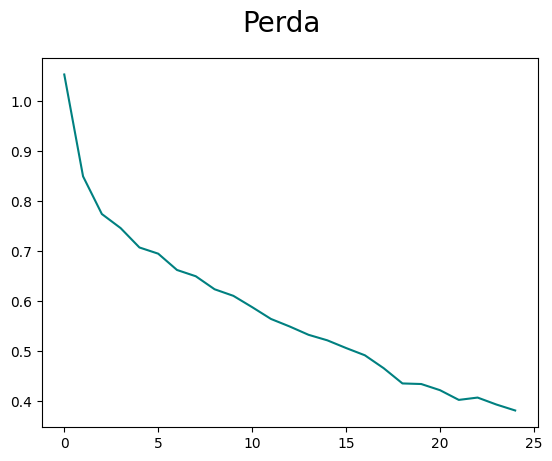

In [14]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
fig.suptitle('Perda', fontsize=20)
plt.show()

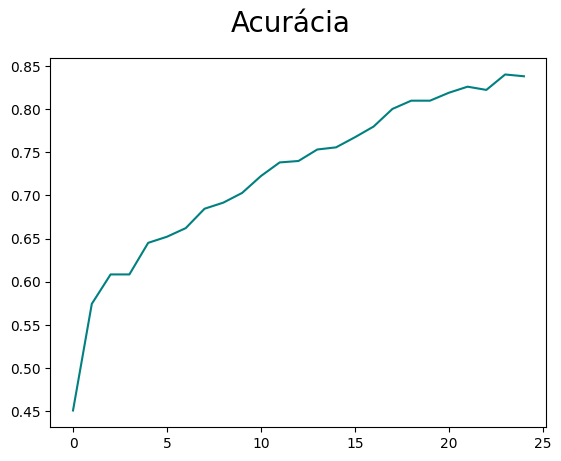

In [15]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Acurácia', fontsize=20)
plt.show()

19/19 [==============================] - 1s 34ms/step


<ipython-input-16-bd678a605523>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
<ipython-input-16-bd678a605523>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


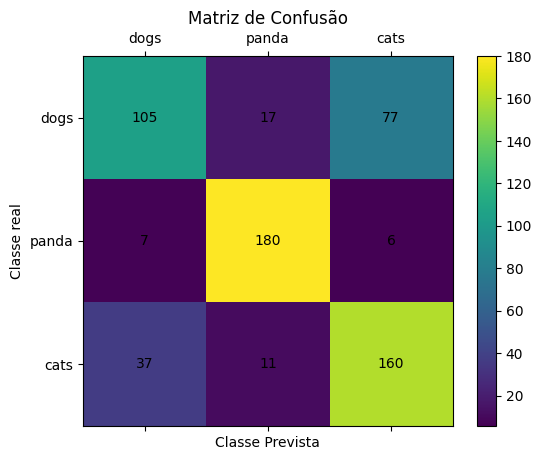


 Acurácia : 74.17%

 Relatório:

              precision    recall  f1-score   support

           0       0.70      0.53      0.60       199
           1       0.87      0.93      0.90       193
           2       0.66      0.77      0.71       208

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.74      0.74      0.73       600



In [16]:
pred = model.predict(testX)
predictions = argmax(pred, axis=1)

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Matriz de Confusão')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Classe Prevista')
plt.ylabel('Classe real')
plt.show()


accuracia = accuracy_score(testY, predictions)
print("\n Acurácia : %.2f%%" % (accuracia*100.0))
relatorio = classification_report(testY, predictions)
print('\n Relatório:\n')
print(relatorio)

# **Aprendizado por transferência**



In [31]:
PreTreinado = EfficientNetV2L(include_top = False, input_shape = (WIDTH, HEIGHT, 3))
for layer in PreTreinado.layers:
  layer.trainable = False


modelo_2 = Sequential()
modelo_2.add(PreTreinado)
modelo_2.add(Flatten())
modelo_2.add(Dropout(0.5))
modelo_2.add(Dense(3, activation="sigmoid"))

modelo_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 2, 2, 1280)       117746848 
 l)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 5120)              0         
                                                                 
 dropout_3 (Dropout)         (None, 5120)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 15363     
                                                                 
Total params: 117,762,211
Trainable params: 15,363
Non-trainable params: 117,746,848
_________________________________________________________________


In [32]:
modelo_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
hist2 = modelo_2.fit(trainX, trainY, batch_size=256, epochs=5, verbose=1 , callbacks=[tensorboard_callback])

Epoch 1/5
10/10 [==============================] - 192s 15s/step - loss: 1.1434 - accuracy: 0.3487
Epoch 2/5
10/10 [==============================] - 143s 14s/step - loss: 1.1479 - accuracy: 0.3408
Epoch 3/5
10/10 [==============================] - 146s 15s/step - loss: 1.1319 - accuracy: 0.3558
Epoch 4/5
10/10 [==============================] - 142s 14s/step - loss: 1.1004 - accuracy: 0.3958
Epoch 5/5
10/10 [==============================] - 146s 15s/step - loss: 1.1146 - accuracy: 0.3867


19/19 [==============================] - 49s 2s/step


<ipython-input-33-e9a7f79bb914>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
<ipython-input-33-e9a7f79bb914>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


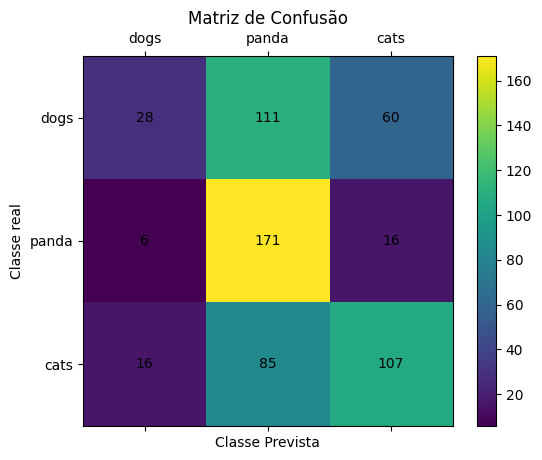


 Acurácia : 51.00%

 Relatório:

              precision    recall  f1-score   support

           0       0.70      0.53      0.60       199
           1       0.87      0.93      0.90       193
           2       0.66      0.77      0.71       208

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.74      0.74      0.73       600



In [33]:
pred_2 = modelo_2.predict(testX)
predictions_2 = argmax(pred_2, axis=1)

cm_2 = confusion_matrix(testY, predictions_2)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm_2)
plt.title('Matriz de Confusão')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm_2[j, i], va='center', ha='center')

plt.xlabel('Classe Prevista')
plt.ylabel('Classe real')
plt.show()


accuracia_2 = accuracy_score(testY, predictions_2)
print("\n Acurácia : %.2f%%" % (accuracia_2*100.0))
relatorio_2 = classification_report(testY, predictions_2)
print('\n Relatório:\n')
print(relatorio)

